Dataset can be downloaded from : https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
576,5150-LJNSR,Male,0,Yes,Yes,31,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,One year,No,Bank transfer (automatic),98.05,3082.1,No
1596,7321-VGNKU,Female,0,Yes,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.35,120.25,No
5858,8241-JUIQO,Female,0,No,No,61,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.45,1336.35,No
6082,4523-WXCEF,Female,0,Yes,No,59,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.10,6039.9,Yes
6389,3777-XROBG,Female,0,Yes,Yes,58,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.55,1079.65,No


In [3]:
#Since customer id will not be useful, we will drop that column
df.drop('customerID', axis = 'columns', inplace = True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
#First TotalCharges will be converted to numbers from strings
#But there are " " like strings. We will ignore those so it doesn't give us errors
#It will convert " " to NA. isnull() tells us if they have " " or not.
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()] # it will return false ones

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
#Checking specific row. Stands for integer location (iloc)
df.iloc[488] 

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [10]:
df.iloc[488]['TotalCharges'] #it is blank

' '

In [11]:
df1 = df[df.TotalCharges!=' '] #store the ones that are not blank
df1.shape

(7032, 20)

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges) #Now it wont give any error

In [15]:
df1.TotalCharges.dtypes #Conversion is successfully done. It became float

dtype('float64')

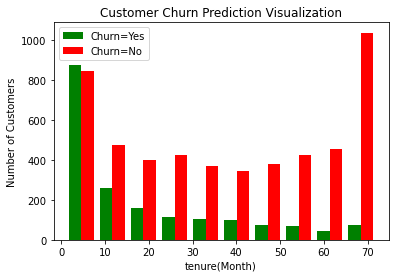

In [24]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure #Tenure info of the people who are not leaving
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure#Tenure info of the people who are leaving


plt.xlabel("tenure(Month)")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['Churn=Yes', 'Churn=No'])#Histogram
plt.legend()

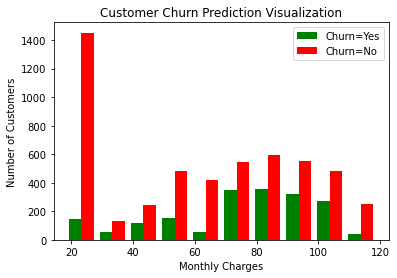

In [25]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges #MonthlyCharges info of the people who are not leaving
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges#MonthlyCharges info of the people who are leaving


plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], color = ['green', 'red'], label = ['Churn=Yes', 'Churn=No'])#Histogram
plt.legend()

In [26]:
for column in df:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [29]:
for column in df:
    print(f'{column} : {df[column].unique()}') #Prints unique values for each column

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [32]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [34]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [36]:
#For better labeling we replace. Also if inplace is true, it modifies data as well.Other wise you have to assign it to df1 again
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True) 

In [37]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [40]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace = True) #Changing Yes/No to 1/0

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [41]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [42]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace = True)

In [43]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [45]:
 #Creates one hot encoding for desired columns
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [46]:
df2.sample(4) #Column numbers increased

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2596,1,0,1,1,21,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
5001,0,0,0,0,19,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
3657,1,0,1,1,37,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
6692,1,0,0,0,41,1,1,1,0,1,...,1,0,0,1,0,0,1,0,0,0


In [47]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [50]:
for col in df2:
    print(f'{col}: {df2[col].unique()}') #All float numbers are between 0-1

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [51]:
#Data cleaning is over. Now time for training.
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [52]:
#We split training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [53]:
X_train.shape

(5625, 26)

In [54]:
X_test.shape

(1407, 26)

In [55]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [57]:
#We have 26 features. We chose output layer's activation sigmoid because it is 1/0
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),   
])

model.compile(optimizer='adam',
              loss='binary_crossentropy', #Because output is zero or one
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5135 - accuracy: 0.7463
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4339 - accuracy: 0.7918
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.7947
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4192 - accuracy: 0.7984
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4172 - accuracy: 0.7988
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4146 - accuracy: 0.8005
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4128 - accuracy: 0.8044
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4109 - accuracy: 0.8032
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4101 - accuracy: 0.8059
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4083 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3816 - accuracy: 0.8242
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3826 - accuracy: 0.8222
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3821 - accuracy: 0.8208
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3822 - accuracy: 0.8196
Epoch 85/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3819 - accuracy: 0.8219
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3817 - accuracy: 0.8196
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3815 - accuracy: 0.8231
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3810 - accuracy: 0.8235
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3815 - accuracy: 0.8208
Epoch 90/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3811 - accuracy: 

In [58]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.7861


[0.4525487422943115, 0.7860696315765381]

In [59]:
yp = model.predict(X_test)
yp[:5]

array([[0.22392212],
       [0.38620296],
       [0.0083662 ],
       [0.78908604],
       [0.43100932]], dtype=float32)

In [63]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [64]:
#We converted 2D array to 1D based on probabilities
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [65]:
#We can compare predictions with y_test
y_pred[:10] 

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.54      0.59       408

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Truth')

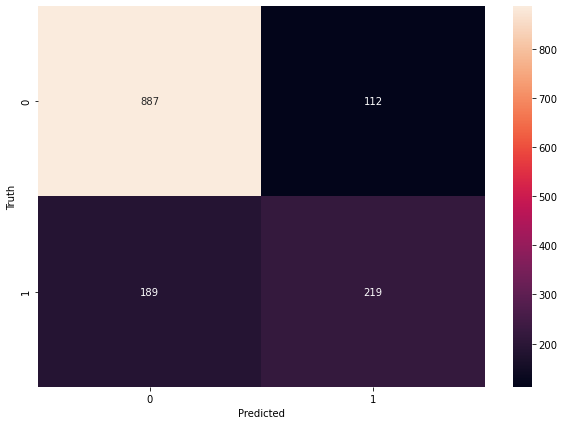

In [67]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
#Correct prediction / Total rounded to 2 decimals. Gives us accuracy.
round((887 + 219) /(887 + 219 + 112 + 189),2)

0.79

In [70]:
#Precision for customers who did not churn is Correct Predicted Zero / Total Zero
round(887 / (887 + 189),2)

0.82

In [71]:
#Precision for customers who did churn is Correct Predicted One / Total One
round(219 / (219 + 112),2)

0.66

In [72]:
#Recall for zero is Correct Zero / Total Zero Truth
round(887 / (887 + 112), 2)

0.89

In [73]:
#Recall for one is Correct One / Total One Truth
round(219 / (219 + 189), 2)

0.54